## How to write a set of distances to file 

In [10]:
# Reading in the Mpro Trajectory and importing in programs I will be using 
import mdtraj as md
import itertools
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

# Let's make up some data with labels
nframes = 1000
distances = []  # add 1D numpy arrays to this list
labels = []
ns_per_snapshot = 0.1  # in nanoseconds
time_in_ns = ns_per_snapshot*np.arange(nframes)
if (1):
    CYS145_HIS163_distances = np.random.rand(nframes)
    labels.append('CYS145_HIS163')
    distances.append(CYS145_HIS163_distances)
    
    TYR126_PHE140_distances = np.random.rand(nframes)
    labels.append('TYR126_PHE140')
    distances.append(TYR126_PHE140_distances)
  
    GLU166_HIS163_distances = np.random.rand(nframes)
    labels.append('GLU166_HIS163')
    distances.append(GLU166_HIS163_distances)
    
# print('CYS145_HIS163_distances', CYS145_HIS163_distances)
# print('TYR126_PHE140_distances', TYR126_PHE140_distances)
# print('GLU166_HIS163_distances', GLU166_HIS163_distances)

# Store all these numbers in one big array

data = np.zeros( (nframes, len(labels)+1) )
data[:,0] = time_in_ns
for i in range(len(labels)):
    data[:,i+1] = distances[i]
print('data', data)

header = 'time(ps)'
for label in labels:
    header += ('\t'+label+'(nm)')
print('header', header)

filename = 'my_distances.dat'
np.savetxt(filename, data, delimiter='\t', fmt='%3.6f', header=header)
print('... Wrote', filename,'.')


data [[0.00000000e+00 3.26686810e-02 8.33002030e-01 9.89022945e-01]
 [1.00000000e-01 9.84033355e-03 9.76919777e-01 2.44443886e-01]
 [2.00000000e-01 9.35794433e-01 3.93158930e-01 1.60576777e-01]
 ...
 [9.97000000e+01 4.73570462e-01 4.33262001e-01 1.57881472e-01]
 [9.98000000e+01 5.40431562e-02 6.48413213e-01 2.31862443e-01]
 [9.99000000e+01 1.18137837e-02 3.88393557e-01 2.35877679e-01]]
header time(ps)	CYS145_HIS163(nm)	TYR126_PHE140(nm)	GLU166_HIS163(nm)
... Wrote my_distances.dat .


In [9]:
help(np.savetxt)

Help on function savetxt in module numpy:

savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)
    Save an array to a text file.
    
    Parameters
    ----------
    fname : filename or file handle
        If the filename ends in ``.gz``, the file is automatically saved in
        compressed gzip format.  `loadtxt` understands gzipped files
        transparently.
    X : 1D or 2D array_like
        Data to be saved to a text file.
    fmt : str or sequence of strs, optional
        A single format (%10.5f), a sequence of formats, or a
        multi-format string, e.g. 'Iteration %d -- %10.5f', in which
        case `delimiter` is ignored. For complex `X`, the legal options
        for `fmt` are:
    
        * a single specifier, `fmt='%.4e'`, resulting in numbers formatted
          like `' (%s+%sj)' % (fmt, fmt)`
        * a full string specifying every real and imaginary part, e.g.
          `' %.4e %+.4ej %.4e %+.4ej %.4

## Read in the data !!!

In [16]:
infile = 'my_distances.dat'
read_data = np.loadtxt(infile)
print(read_data)

# grab the headers
fin = open(infile, 'r')
lines = fin.readlines()
if (0):
    headers = lines[0].strip().split('\t')
else:
    headers = lines[0].strip().replace('# ','').split('\t')
fin.close()

print('headers', headers)



[[0.00000e+00 3.26690e-02 8.33002e-01 9.89023e-01]
 [1.00000e-01 9.84000e-03 9.76920e-01 2.44444e-01]
 [2.00000e-01 9.35794e-01 3.93159e-01 1.60577e-01]
 ...
 [9.97000e+01 4.73570e-01 4.33262e-01 1.57881e-01]
 [9.98000e+01 5.40430e-02 6.48413e-01 2.31862e-01]
 [9.99000e+01 1.18140e-02 3.88394e-01 2.35878e-01]]
headers ['time(ps)', 'CYS145_HIS163(nm)', 'TYR126_PHE140(nm)', 'GLU166_HIS163(nm)']


In [12]:
help(np.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence of str, optional
        The char

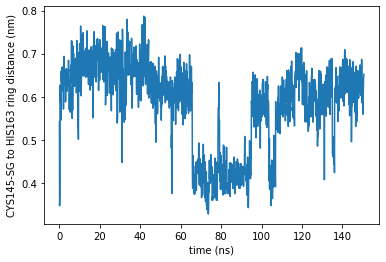

In [25]:
plt.figure()
time_in_ns = 0.100*np.arange(CYS145_HIS163_distances.shape[0]) 
plt.plot(time_in_ns, CYS145_HIS163_distances)
plt.xlabel('time (ns)')
plt.ylabel('CYS145-SG to HIS163 ring distance (nm)')
plt.show()